In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv(r"train_tweets_hatespeech.csv")
test_df = pd.read_csv(r"test_tweets_hatespeech.csv")


print(train_df.shape)
print(test_df.shape)

(31962, 3)
(17197, 2)


In [2]:

train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [24]:
test_df.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...


In [25]:
train_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

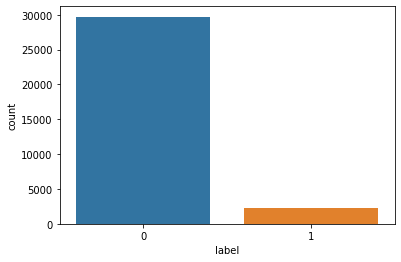

In [26]:
import seaborn as sns

sns.countplot(x= 'label', data = train_df)

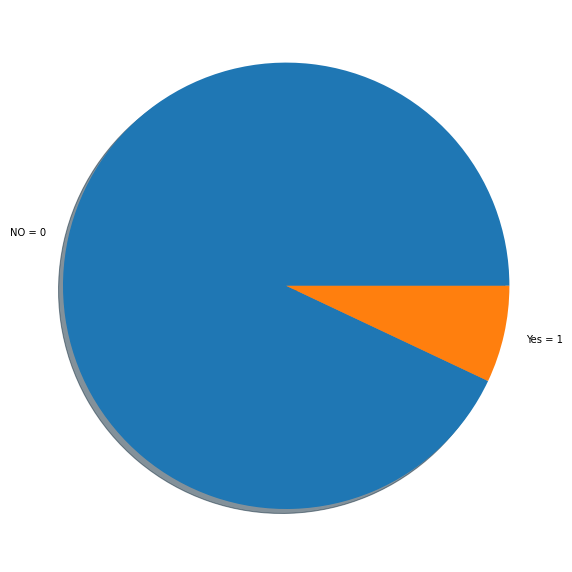

In [27]:
plt.figure(1, figsize=(10,20))
plt.pie(train_df['label'].value_counts(), labels=['NO = 0','Yes = 1'], shadow=True)
plt.show()

## DATA CLEANING

In [28]:
import re

def cleaned_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df

In [29]:
test_clean = cleaned_text(test_df, "tweet")
train_clean = cleaned_text(train_df, "tweet")

In [30]:
test_clean.shape

(17197, 2)

In [31]:
train_clean.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


### we have unblanced data here 
to solve this we are oversampling the data

In [32]:
from sklearn.utils import resample

train_majority = train_clean[train_clean.label == 0]
train_minority = train_clean[train_clean.label == 1]

In [33]:
train_majority

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31956,31957,0,off fishing tomorrow carnt wait first time in...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...


In [34]:
train_minority_upsampled = resample(train_minority, replace=True,
                                    n_samples=len(train_majority),
                                    random_state=123)

In [35]:
train_minority_upsampled.tail(10)
#print(len(train_minority_upsampled))

,id,label,tweet
5977,5978,1,please just stop
25022,25023,1,no youre just supposed to be quiet and look p...
10462,10463,1,are you hispanic amp feel the are stomping o...
22572,22573,1,trumps pick for attorney general is shadowed b...
3119,3120,1,check this out i mentioned this org to you ba...
30530,30531,1,homicides rose in most big cities this year t...
21155,21156,1,the major kind of that people arent talking ...
30537,30538,1,he may be correct i just cant pay attention to...
6169,6170,1,a look at the repug gop pay bigots at
26670,26671,1,it is truly sad a who lot of working class men...


In [36]:
train_upsampled = pd.concat([train_minority_upsampled, train_majority])

In [37]:
train_upsampled['label'].value_counts()

0    29720
1    29720
Name: label, dtype: int64

In [38]:
import numpy as np

np.random.seed(6)

train_upsampled = train_upsampled.sample(frac=1).reset_index(drop=True)

train_upsampled.head(10)

,id,label,tweet
0,28695,0,so easy to make woman but only sma men under...
1,1337,1,yay except ellen made comments so should we b...
2,1534,0,windows10 split screen browser techie sg...
3,1007,1,radicalism shouldnt be countered with terror...
4,24202,1,you hispanic amp feel like the are stomping ...
5,19547,0,happy days sun sunbathing tan holiday pool ...
6,747,1,trump used hate and putin to win the white h...
7,13988,1,allahsoil the kneejerk reaction is to assume ...
8,23693,1,and again they are flight attendants gender...
9,27542,1,are you hispanic amp feel like the are stompi...


<AxesSubplot:xlabel='label', ylabel='count'>

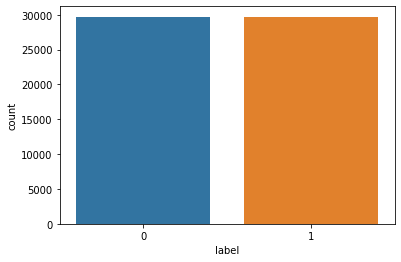

In [39]:
sns.countplot(x='label', data=train_upsampled)

In [40]:
# Creating a Pipline

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

pipline_sgdmodel = Pipeline([  ('vect', CountVectorizer()),
                               ('tfidf', TfidfTransformer()),
                               ('nb', SGDClassifier())      
                            ])

# Training and testing

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'], train_upsampled['label'], random_state = 0)

In [43]:
model = pipline_sgdmodel.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [44]:
y_test = np.array(y_test)

In [45]:
for i in range(20):
    print("predicted label: "  , y_predict[i],"<-->", "actual label: ", y_test[i]," [ Prediction is ", y_predict[i]==y_test[i], "]")

predicted label:  1 <--> actual label:  1  [ Prediction is  True ]
predicted label:  1 <--> actual label:  1  [ Prediction is  True ]
predicted label:  0 <--> actual label:  0  [ Prediction is  True ]
predicted label:  0 <--> actual label:  0  [ Prediction is  True ]
predicted label:  1 <--> actual label:  1  [ Prediction is  True ]
predicted label:  1 <--> actual label:  1  [ Prediction is  True ]
predicted label:  1 <--> actual label:  1  [ Prediction is  True ]
predicted label:  0 <--> actual label:  0  [ Prediction is  True ]
predicted label:  1 <--> actual label:  1  [ Prediction is  True ]
predicted label:  0 <--> actual label:  0  [ Prediction is  True ]
predicted label:  0 <--> actual label:  0  [ Prediction is  True ]
predicted label:  1 <--> actual label:  1  [ Prediction is  True ]
predicted label:  0 <--> actual label:  0  [ Prediction is  True ]
predicted label:  1 <--> actual label:  1  [ Prediction is  True ]
predicted label:  0 <--> actual label:  0  [ Prediction is  Tr

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9648481626686157